In [9]:
# https://youtu.be/0B5eIE_1vpU?si=nhzSmKH98266qmHL

In [10]:
from sklearn.datasets import fetch_california_housing

In [11]:
X, y = fetch_california_housing(return_X_y=True)

In [12]:
# print(housing.data.shape, housing.target.shape)

In [13]:
# print(housing.feature_names[:])

In [14]:
# housing.data

In [15]:
# housing.target

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [17]:
mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)[:3]

array([4.13164983, 3.97660644, 3.67657094])

In [18]:
mod = KNeighborsRegressor()
mod.fit(X, y)
mod.predict(X)[:3]

array([2.826802, 2.1594  , 3.650404])

In [19]:
y[:3]

array([4.526, 3.585, 3.521])

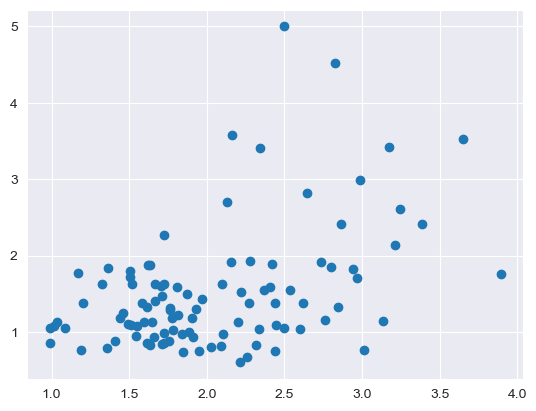

In [21]:
import matplotlib.pylab as plt
pred = mod.predict(X)
plt.scatter(pred[:100], y[:100])


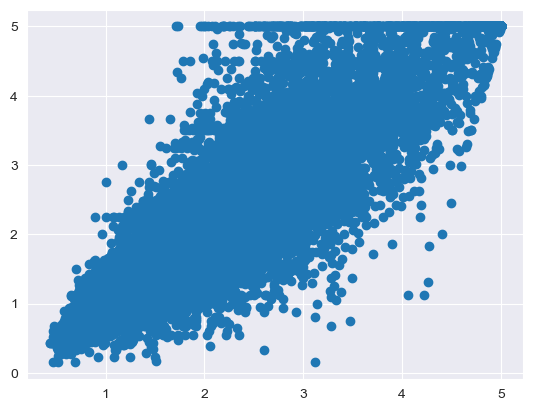

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

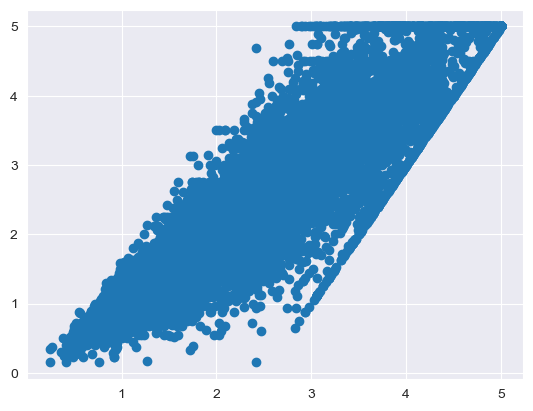

In [24]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=2))
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

In [25]:
from sklearn.model_selection import GridSearchCV
mod = GridSearchCV(estimator=pipe,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)
mod.fit(X, y);

In [27]:
import pandas as pd
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015995,0.001787,0.507571,0.057929,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.014179,0.000447,0.509258,0.041043,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.013709,0.000629,0.546610,0.043858,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.013885,0.000548,0.588503,0.037779,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.014190,0.001155,0.635546,0.075033,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.013643,0.000744,0.622652,0.040597,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.019081,0.004639,0.707525,0.056534,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.013857,0.000520,0.675596,0.037148,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.013169,0.000241,0.672921,0.070346,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.015300,0.002976,0.736662,0.087719,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


In [28]:
fetch_california_housing()['DESCR']

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S